**Método de aceptación y rechazo**

Generar una muestra de la variable con distribución:

$$f(x)=20x(1-x)^3,\hspace{1cm}0<x<1$$

Usando $g(x)=1$, $\hspace{0.5cm} 0<x<1$.

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

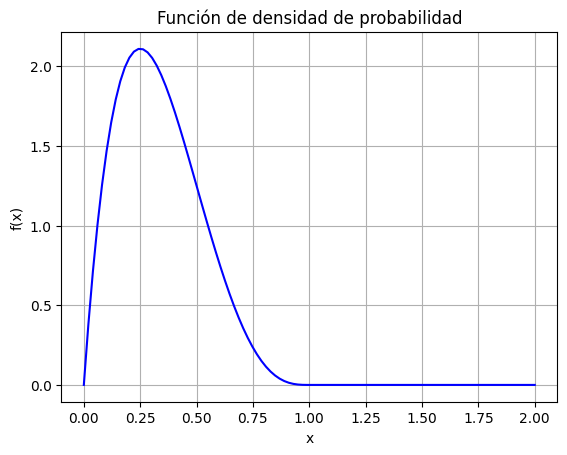

In [4]:
# Definir la función
def f(x):
    if 0 <= x <= 1:
        resultado = 20*x*(1-x)**3
    else:
        resultado = 0
    return resultado

# Crear valores de x para graficar
x_values = np.linspace(0, 2, 100)  # Rango de valores de x

# Calcular los valores de la función para cada valor de x
y_values = [f(x) for x in x_values]

# Graficar la función
plt.plot(x_values, y_values, color='blue')
plt.title('Función de densidad de probabilidad')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Ahora obtenemos la función de distribución acumulativa:

La función de distribución acumulativa de una variable aleatoria continua $X$ es la probabilidad de que $X$ tome un valor menor o igual a algun $x$ especifico. Esto es:

$$F(x)=\int_{-∞}^x f(t)dt$$

Entonces,

$$F(x)=\int_0^x 20t(1-t)^3dt=-20\int_0^x t(t-1)^3dt$$

Hacemos el cambio de variable $u=t-1$ y $du=dt$

$$F(x)=-20\int_0^x u^3(u+1)du=-20\int_0^x (u^4+u^3)du=-20\left(\frac{u^5}{5}+\frac{u^4}{4}\right)\Bigg|_0^x=-4x^5-5x^4=-4(x-1)^5-5(x-1)^4$$

Simplificando

$$F(x)=-4x^5+15x^4-20x^3+10x^2-1\hspace{1cm}0<x<1$$

Esto se muestra en la siguiente grafica.

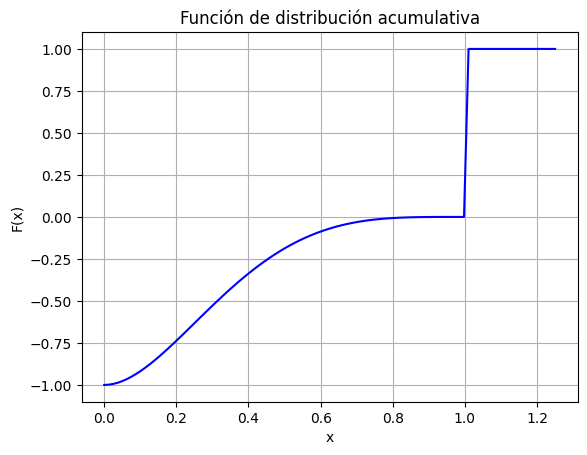

In [9]:
# Definir la función
def F(x):
    if 0 <= x <= 1:
        resultado = -4*x**5+15*x**4-20*x**3+10*x**2-1
    else:
        resultado = 1
    return resultado

# Crear valores de x para graficar
x_values = np.linspace(0, 1.25, 100)  # Rango de valores de x

# Calcular los valores de la función para cada valor de x
y_values = [F(x) for x in x_values]

# Graficar la función
plt.plot(x_values, y_values, color='blue')
plt.title('Función de distribución acumulativa')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

Queremos generar $X\sim f(x)$, ya que sabemos generar $g(x)$ y sabemos que

$$\frac{f(y)}{g(y)}\leq c$$

para toda $y$.

Tenemos que hayar el valor de c, aplicamos el criterio de la derivada para encontrar el valor optimo.

$$\frac{d}{dx}\left(\frac{f(x)}{g(x)}\right)=20[(1-x)^3-3x(1-x)^2]=0$$
$$⟹1-3x+3x^2-x^3-3x(1-2x+x^2)=0$$
$$⟹1-6x+9x^2-4x^3=0$$
$$⟹-(x-1)(4x^2-5x+1)=0$$
$$⟹-(x-1)^2(4x-1)=0$$

Obtuvimos dos posibles valores para $x$, sin embargo uno de ellos es $x=1$ y tenemos una restricción que nos dice que $x$ no puede tomar este valor, entonces el optimo es $x=\frac{1}{4}$, sustituyendo en $f(x)$:

$$f\left(\frac{1}{4}\right)=20\left(\frac{1}{4}\right)\left(1-\frac{1}{4}\right)^3=5\left(\frac{27}{64}\right)=\frac{135}{64}$$

Tomamos este como el valor de c ya que es el punto mas alto que alcanza nuestra función.

Ahora generamos la muestra de números aleatorios $U$, de forma que cumplan

$$U\leq \frac{f(y)}{cg(y)}$$

donde $y$ tiene densidad $g$.

In [11]:
def f(n, c = 135 / 64):
    lista = []
    for i in range(n):
        y = rnd.random()
        U = rnd.random()
        if U <= (20 * y * (1 - y)**3) / c:
          X = (20 * y * (1 - y)**3) / c
          lista.append(X)
    return lista

print(f(10))

[0.9534505704019997, 0.8172780215579762, 0.2342425974646161, 0.27244767582766233, 0.9398968405458056]


In [12]:
G = f(10000) # Obtención de media, varianza y mediana
media = np.mean(G)
varianza = np.var(G)
mediana = np.median(G)
print(f'Mediana: {mediana}')
print(f'Media: {media}')
print(f'Varianza: {varianza}')

Mediana: 0.8494569004408544
Media: 0.7556547736073025
Varianza: 0.06303948301457236


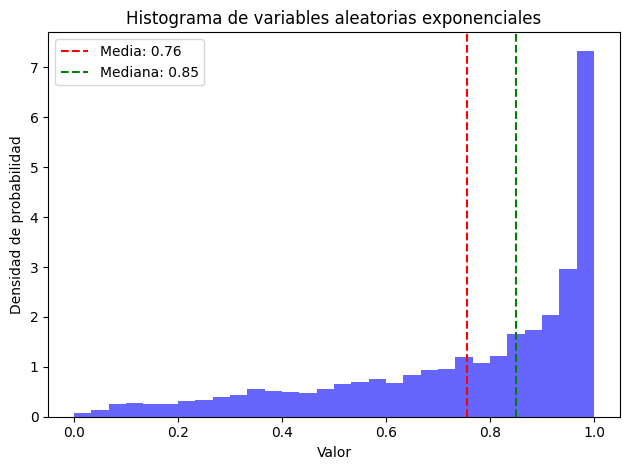

In [13]:
# Generación del grafico de la función de distribución
plt.hist(G, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}') # Media
plt.axvline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}') # Mediana

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de variables aleatorias exponenciales')
plt.legend()

plt.tight_layout()

plt.tight_layout()
plt.show()

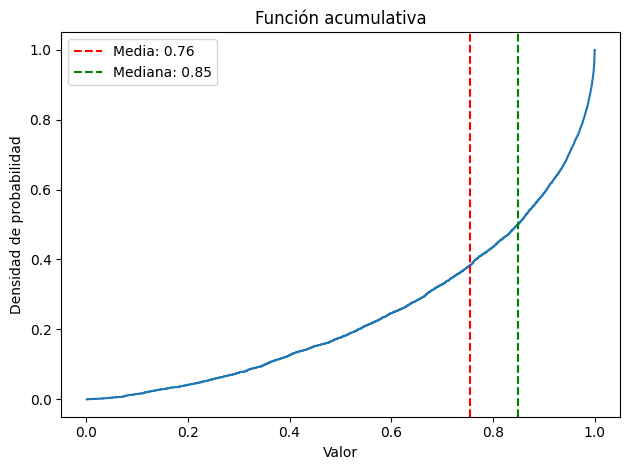

In [14]:
# Generación de función acumulativa
def cdf(G):
    n = len(G)
    x = np.sort(G)
    y = np.arange(0, n)/n
    return x,y

X, Y = cdf(G)

plt.step(X, Y)
plt.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}') # Media
plt.axvline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}') # Mediana

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Función acumulativa')
plt.legend()

plt.tight_layout()

plt.tight_layout()
plt.show()